<a href="https://colab.research.google.com/github/msharma1207/Customer-_Segmentation-_using_Clustring/blob/main/Clustering_Analysis_Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Check the shape of the dataset
print('Shape of the dataset:', df.shape)

# Check the data types of the columns
print('\nData types of the columns:')
print(df.dtypes)

# Check for missing values
print('\nMissing values in each column:')
print(df.isnull().sum())

# Get a summary of the numerical columns
df.describe().astype(int)

Shape of the dataset: (200, 5)

Data types of the columns:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Missing values in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200,200,200,200
mean,100,38,60,50
std,57,13,26,25
min,1,18,15,1
25%,50,28,41,34
50%,100,36,61,50
75%,150,49,78,73
max,200,70,137,99


In the initial phase of our data analysis project, we began by examining the structure and characteristics of our dataset.

We first checked the shape of the dataset, giving us an understanding of the volume of data we are dealing with, in terms of the number of observations and variables.

Next, we looked at the data types of each column, which is crucial as it determines the kind of operations we can perform on each variable. We then checked for missing values in each column, an important step in data preprocessing, as missing values can lead to incorrect or biased results.

Lastly, we used the describe() function to get a summary of the numerical columns, providing us with a quick overview of the distribution of each numerical variable.

These steps, part of the exploratory data analysis process, are essential in understanding the dataset's structure, characteristics, and potential issues before proceeding with further analysis or modeling.

Statistical Summary of Numerical Features
Age
Our customers’ average age is 39, with a range from 18 to 70. Around 25% are younger than 29 (25th percentile), while the median age is 36. Additionally, 75% are younger than 49 (75th percentile), indicating a predominantly younger customer base. The standard deviation of approximately 14 suggests a fair spread of ages.

Annual Income
The average annual income is approximately $60.5k, with a standard deviation of around $26.3k, suggesting a significant range in incomes. The lowest recorded income is $15k, while the highest is $137k. The 25th percentile represents an income of $41.5k, the median is $61.5k, and the 75th percentile corresponds to an income of $78k.

Spending Score
The average spending score is 50.2, with a standard deviation of about 25.8, indicating a broad range of spending behaviors. The lowest score recorded is 1, while the highest is 99. The 25th percentile corresponds to a score of 34.75, the median is 50, and the 75th percentile represents a score of 73.

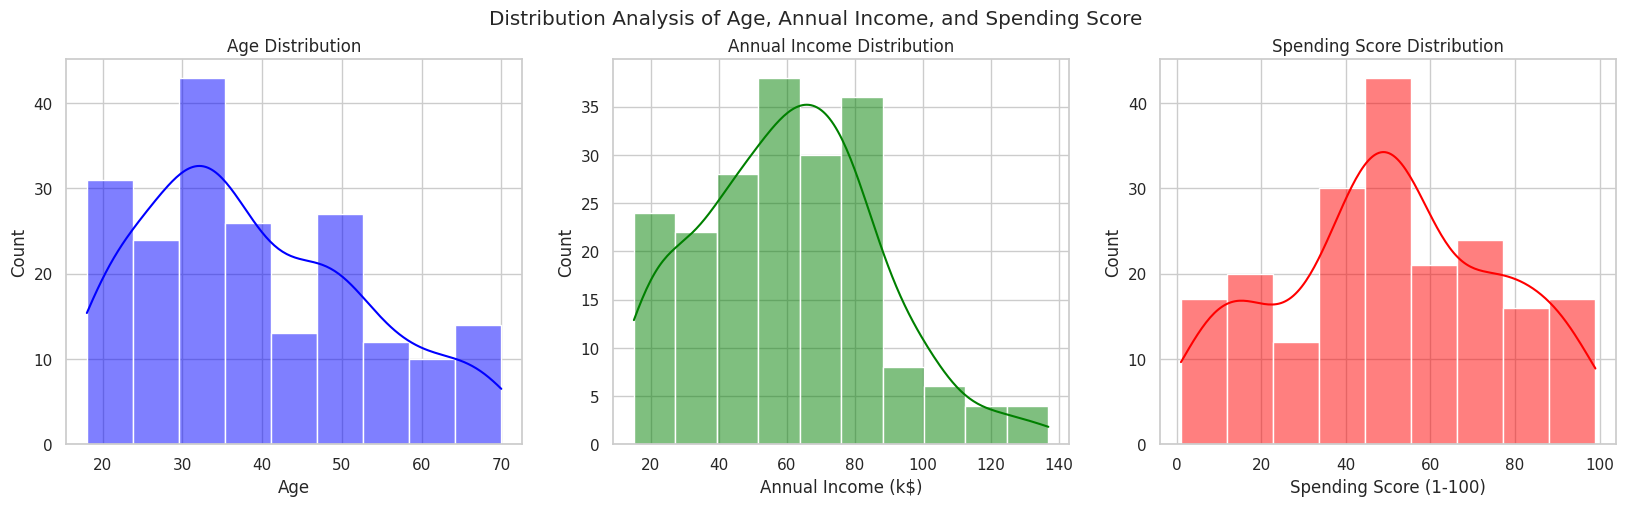

In [4]:
#Customer Feature Distributions
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the seaborn plot
sns.set(style='whitegrid')

# Create a figure and axis objects
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot the distribution of age, annual income, and spending score
sns.histplot(data=df, x='Age', kde=True, color='blue', ax=axs[0])
sns.histplot(data=df, x='Annual Income (k$)', kde=True, color='green', ax=axs[1])
sns.histplot(data=df, x='Spending Score (1-100)', kde=True, color='red', ax=axs[2])

# Set the titles of the plots
axs[0].set_title('Age Distribution')
axs[1].set_title('Annual Income Distribution')
axs[2].set_title('Spending Score Distribution')

# Set the title for the entire plot
fig.suptitle('Distribution Analysis of Age, Annual Income, and Spending Score')

# Display the plots
plt.show()

The mall’s customer base is predominantly younger, as indicated by the left-skewed age distribution. This suggests that the mall’s offerings are particularly appealing to younger individuals. Similarly, the left-skewed annual income distribution suggests that the mall attracts a wealthier clientele.

The spending score distribution is centered, indicating a balanced mix of low-spending and high-spending customers. This suggests that the mall appeals to a wide range of customers in terms of spending behavior. To gain more detailed insights, the next step is to segment customers into distinct groups using a clustering algorithm based on these features.

Elbow Method
The Elbow Method is a technique used to determine the optimal number of clusters for the K-means clustering algorithm. K-means requires us to specify the number of clusters beforehand, which can be challenging.

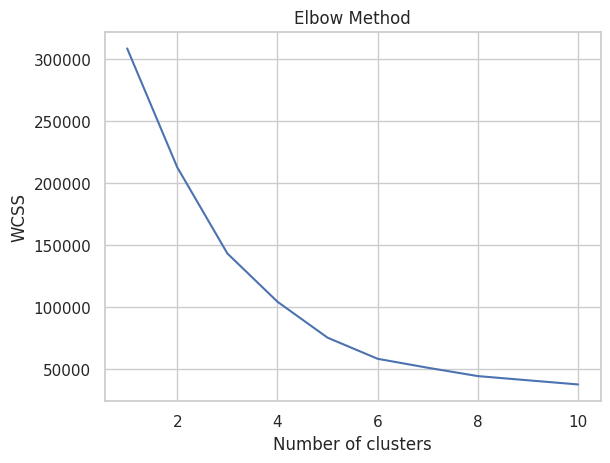

In [5]:
from sklearn.cluster import KMeans

# Select the features to use for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The Elbow Method helps by running K-means with different numbers of clusters and plotting the resulting scores. The point where the score begins to decrease more slowly (the “elbow”) is considered the optimal number of clusters.

KMeans
In simpler terms, the KMeans model with 5 clusters is a way of grouping our data into 5 distinct categories or “clusters” .The number 5 is chosen based on the Elbow Method above.

When we “fit” the model, we’re asking the algorithm to learn from our data and form these clusters. The algorithm does this by finding the center point of each cluster and assigning each data point to the cluster whose center is closest.

In [6]:
# Create the KMeans model with the optimal number of clusters (assumed to be 5 based on the elbow method)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the model to the data and predict the cluster labels
labels = kmeans.fit_predict(features)

# Add the cluster labels to the dataframe
df['Cluster'] = labels

# Display the first few rows of the dataframe with the cluster labels
df.head(100)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
95,96,Male,24,60,52,2
96,97,Female,47,60,47,2
97,98,Female,27,60,50,2
98,99,Male,48,61,42,2


After the model is fitted, it can predict which cluster any data point belongs to. These predictions, known as “cluster labels”, are then added to our original data for easy reference.

So, “KMeans model with 5 clusters fits the model to data and adds the predicted cluster labels to the dataframe” simply means we’re using the KMeans algorithm to group our data into 5 clusters and recording these groupings in our data.

**Understanding de Cluster Characteristics**

The code below is used to understand the characteristics of each cluster by calculating the mean values of ‘Age’, ‘Annual Income (k$)’, and ‘Spending Score (1–100)’ for each cluster.

In [7]:
# Calculate the mean values of Age, Annual Income, and Score for each cluster
cluster_means = df.groupby('Cluster')[
['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().astype(int)

# Display the cluster means
cluster_means

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,45,26,20
1,32,86,82
2,43,55,49
3,40,87,17
4,25,26,78


By doing this, we can get a sense of the average age, annual income, and spending score of the customers in each cluster, which can provide valuable insights into the types of customers that make up each group.

**Annual Income vs Spending Score**

The scatter plot is a visual representation of how the KMeans algorithm has grouped the customers into clusters based on their annual income and spending score. Each point on the plot represents a customer, and the color of the point indicates which cluster the customer belongs to.

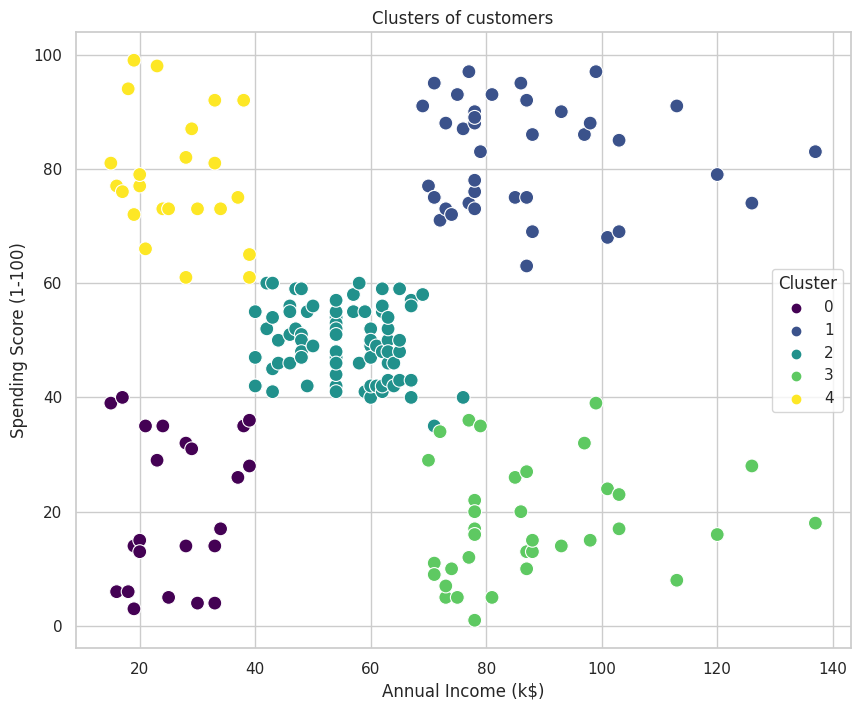

In [8]:
# Create a scatter plot of 'Annual Income (k$)' vs 'Spending Score (1-100)' colored by 'Cluster'
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)

# Add a title to the plot
plt.title('Clusters of customers')

# Display the plot
plt.show()

**Interpreting the Clusters**

The clusters we’ve identified provide a clear picture of different customer segments based on their income and spending habits. Here’s a simplified breakdown:

**Low income, low spending:** Customers with an annual income between 20 and 40k and a spending score between 0 and 40. They have lower incomes and tend to spend less.

**High income, low spending:** Customers with an annual income between 55 and 140k and a spending score between 0 and 40. Despite their higher incomes, they tend to spend less.

**Medium income, medium spending:** Customers with an annual income between 40 and 80k and a spending score between 40 and 60. These customers have moderate incomes and spending habits. This is the most concentrated cluster, indicating a large number of customers fall into this category.

**Low income, high spending:** Customers with an annual income between 20 and 40k and a spending score between 60 and 100. Interestingly, these customers have lower incomes but tend to spend more.

**High income, high spending:** Customers with an annual income between 70 and 140k and a spending score between 60 and 100. These customers have higher incomes and also tend to spend more.

**Customer Segments Based on Age and Spending Score**

This scatter plot provides a visual representation of customer segments based on age and spending score. Each color represents a different cluster, or customer segment.

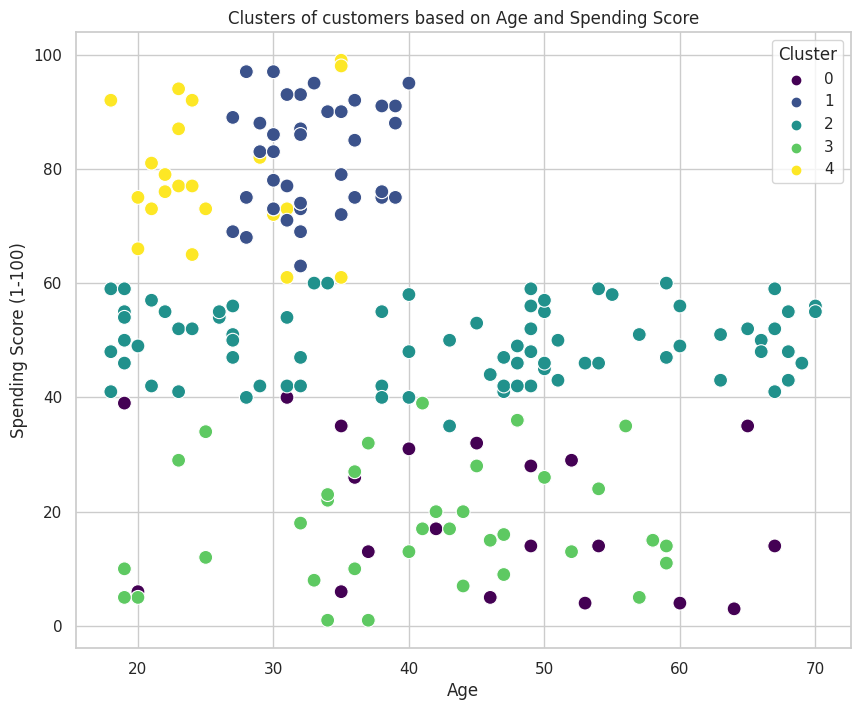

In [9]:
# Create a scatter plot of Age vs Spending Score
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster',
palette='viridis', s=100)

# Add a title to the plot
plt.title('Clusters of customers based on Age and Spending Score')

# Display the plot
plt.show()

**Young, high spenders:** This cluster represents younger customers who have high spending scores. They might be attracted to trendy items and are willing to spend more. These two clusters include customers in their 20s and 30s with a spending score between 60 and 100. The fact that these clusters are almost overlapping could suggest that age is less of a distinguishing factor among these high-spending customers. These customers are likely to be the mall’s high-value customers due to their high spending scores.

**Middle-aged, moderate spenders:** This cluster represents customers in their middle age with moderate spending scores. They might be more conservative in their spending habits. This cluster includes ages ranging from 20 to 70 and a spending score between 40 and 60. This is a broad age range, suggesting that the mall attracts customers of various ages who have a moderate spending score. This could be the mall’s primary customer base.

**Older, low spenders:** This cluster represents older customers who have low spending scores. They might be more frugal or less attracted to the products offered.

The scatter plot allows us to visualize these segments, providing valuable insights into the different types of customers that visit the mall. This information can be used to tailor marketing strategies and product offerings to each specific group.

**Gender Distribution Across Clusters**

This plot can help you understand if there are any differences in gender distribution among the clusters.

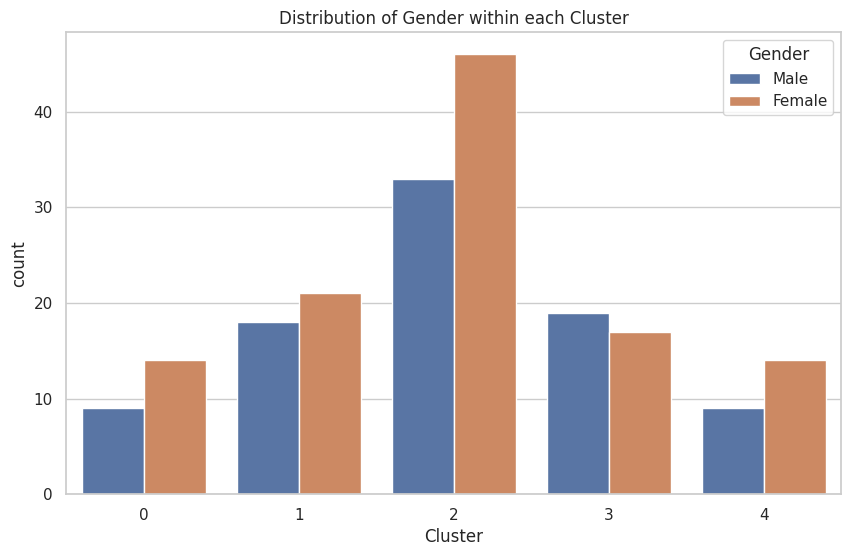

In [10]:
# Create a count plot to show the distribution of 'Gender' within each cluster
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cluster', hue='Gender')

# Add a title to the plot
plt.title('Distribution of Gender within each Cluster')

# Display the plot
plt.show()

The clusters generally exhibit a balanced gender distribution, with a few intriguing deviations. The Cluster 2 stands out with a significantly higher proportion of women. This suggests that middle-aged women with moderate spending habits form a key demographic for this mall.

Interestingly, the Cluster 3 is the only cluster where men slightly outnumber women. This could indicate different shopping habits or preferences between the genders as they age. In all other clusters, women are the majority, indicating that they form a significant part of the mall’s customer base.

Exploring Pairwise Relationships: A Pairplot Overview
The pairplot is a powerful visualization tool that provides a bird’s-eye view of the pairwise relationships between different features in our dataset. Each scatterplot in the grid represents the relationship between two features, with the color of the points indicating the cluster to which each customer belongs.

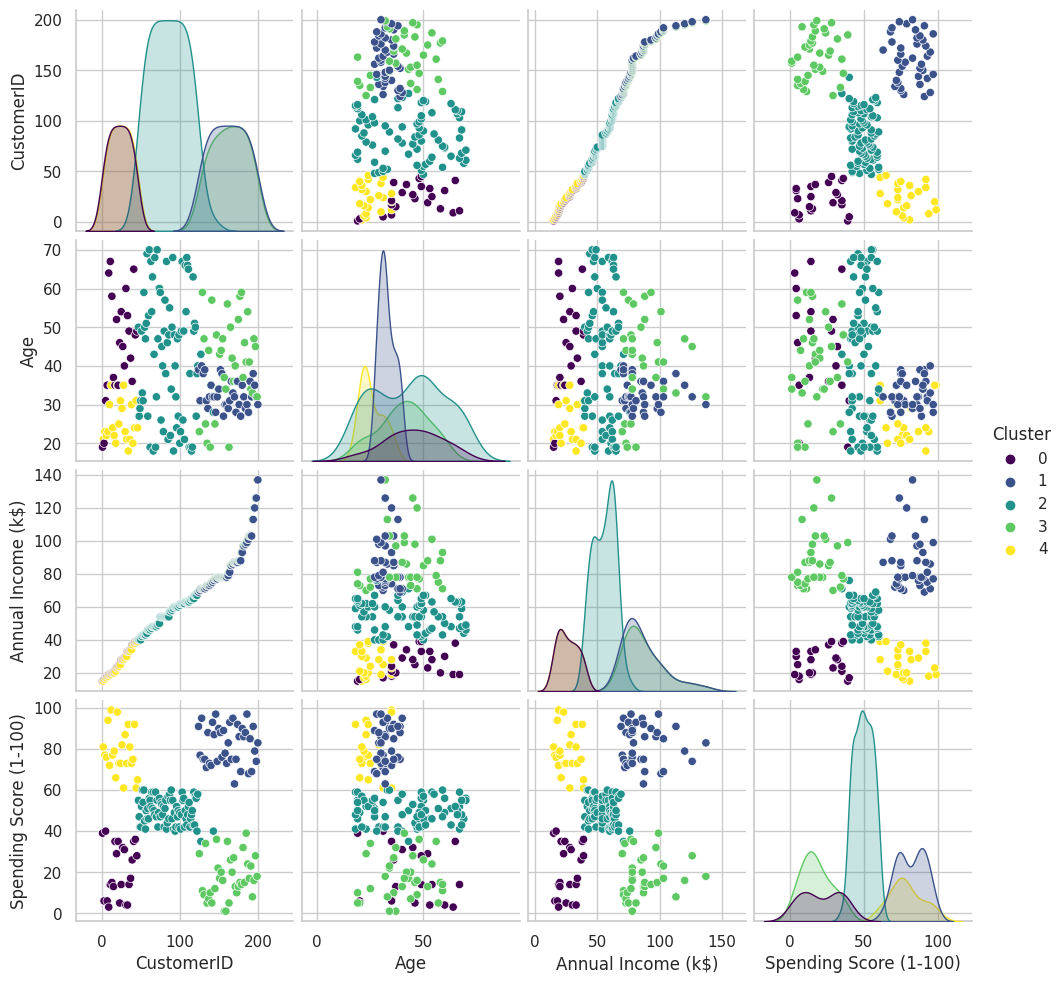

In [11]:
# Create a pairplot for relationships between the different features
sns.pairplot(df, hue='Cluster', palette='viridis')

# Display the plot
plt.show()

This visualization allows us to observe how the clusters are distributed based on different combinations of features. It can reveal interesting patterns and relationships that might not be immediately apparent from looking at the individual features alone.

**Cluster Characteristics: Boxplot Analysis**

Boxplots are a great way to visualize the distribution of numerical data and can provide a lot of insights about the characteristics of each cluster.

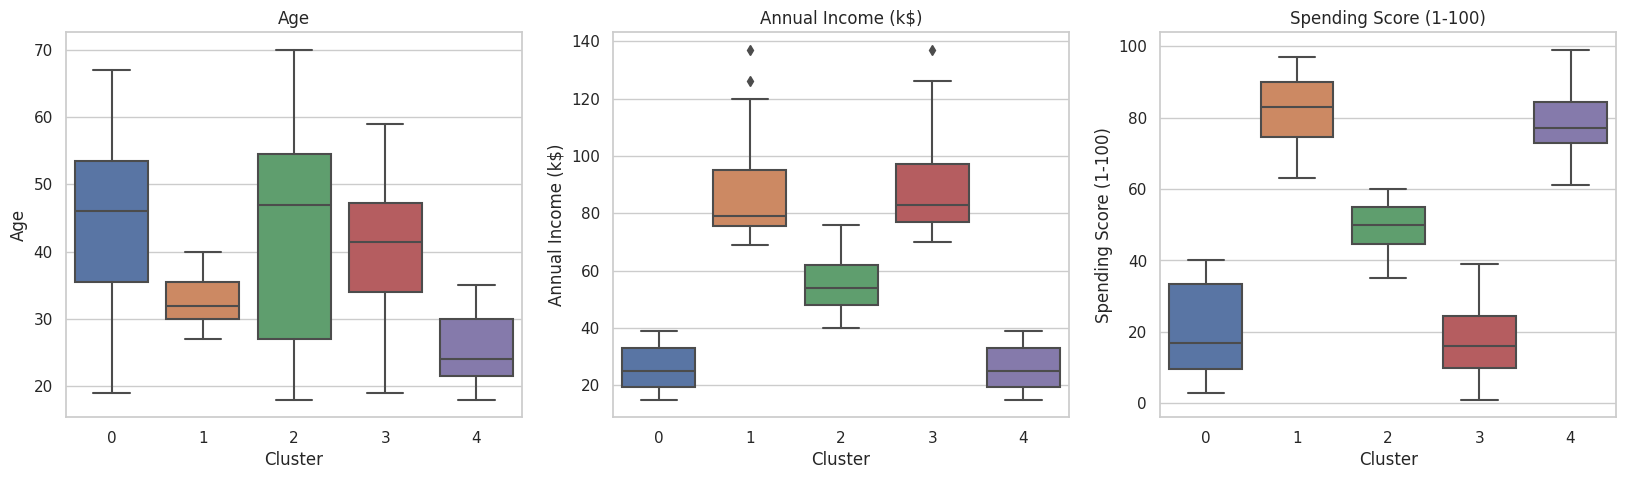

In [12]:
# Create a boxplot for each feature split by 'Cluster'
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Boxplot for 'Age'
sns.boxplot(data=df, x='Cluster', y='Age', ax=axs[0])
axs[0].set_title('Age')

# Boxplot for 'Annual Income (k$)'
sns.boxplot(data=df, x='Cluster', y='Annual Income (k$)', ax=axs[1])
axs[1].set_title('Annual Income (k$)')

# Boxplot for 'Spending Score (1-100)'
sns.boxplot(data=df, x='Cluster', y='Spending Score (1-100)', ax=axs[2])
axs[2].set_title('Spending Score (1-100)')

# Display the plots
plt.show()

By comparing the boxplots, we can observe how the clusters differ in terms of these features. For instance, we might find that one cluster has a higher median annual income compared to the others, or that the age range is wider for one cluster than for the rest.

**Silhouette Score**

The silhouette score is a measure of how well each datapoint lies within its cluster. It’s a way to quantify the quality of the clustering. The score ranges from -1 to 1.

In [13]:
# Import the necessary libraries
from sklearn.metrics import silhouette_score

# Compute the silhouette score for the clustering
silhouette_score = silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']], df['Cluster'])

# Print the silhouette score
print('Silhouette Score: ', silhouette_score)

# Silhouette Score:  0.44428597560893024

Silhouette Score:  0.44428597560893024


A silhouette score near 1 indicates high-quality clustering, with datapoints in the same cluster close to each other and far from other clusters.

A score near 0 suggests overlapping clusters, indicating low-quality clustering and a score near -1 suggests datapoints are incorrectly clustered and would fit better in another cluster.

Our silhouette score of 0.44 suggests reasonable clustering, but there’s room for improvement. Potential strategies include:

**1.Feature Engineering:** Create new features to better capture data structure.

**2.Different Clustering Algorithm:** Consider alternatives to KMeans, like Hierarchical Clustering, DBSCAN, or Gaussian Mixture Models.

**3.Tune KMeans Parameters:** Adjust parameters like centroid initialization method or number of iterations.

**4.Scaling Features:** Scale features to have a mean of 0 and standard deviation of 1, as KMeans is sensitive to feature scale.

**5.Increase the Number of Clusters:** Try increasing the number of clusters to potentially improve the silhouette score.

**Scaling Feature**

Let’s scale the features and then apply KMeans clustering to the scaled features. This can help improve the quality of the clustering, as KMeans is sensitive to the scale of the features.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the features and transform them
scaled_features = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']])

# Create a new KMeans object
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the KMeans object to the scaled features
kmeans.fit(scaled_features)

# Assign the cluster labels to a new column in the dataframe
df['Scaled_Cluster'] = kmeans.labels_

# Compute the silhouette score for the new clustering
scaled_silhouette_score = silhouette_score(scaled_features, df['Scaled_Cluster'])

# Print the silhouette score
print('Scaled Silhouette Score:', scaled_silhouette_score)

## Scaled Silhouette Score: 0.41664341513732767

Scaled Silhouette Score: 0.41664341513732767


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The silhouette score after scaling the features has **slightly decreased from 0.44 to 0.416.** This might seem counterintuitive as scaling is generally a good practice before applying KMeans clustering. However, it’s important to note that scaling doesn’t always guarantee an improvement in the silhouette score.

**Agglomerative Clustering to the scaled features**

In [16]:
# Import the necessary libraries
from sklearn.cluster import AgglomerativeClustering

# Create an AgglomerativeClustering object
agg_clustering = AgglomerativeClustering(n_clusters=5)

# Fit the AgglomerativeClustering object to the scaled features
agg_clustering.fit(scaled_features)

# Import the necessary libraries
from sklearn.cluster import AgglomerativeClustering

# Create an AgglomerativeClustering object
agg_clustering = AgglomerativeClustering(n_clusters=5)

# Fit the AgglomerativeClustering object to the scaled features
agg_clustering.fit(scaled_features)

# Assign the cluster labels to a new column in the dataframe
df['Agg_Cluster'] = agg_clustering.labels_

# Compute the silhouette score for the new clustering
agg_silhouette_score = silhouette_score(scaled_features, df['Agg_Cluster'])

# Print the silhouette score
print('Agglomerative Clustering Silhouette Score: ', agg_silhouette_score)

# Agglomerative Clustering Silhouette Score:  0.39002826186267214

Agglomerative Clustering Silhouette Score:  0.39002826186267214


**Principal Component Analysis**

It is a technique used in machine learning to reduce the dimensionality of data. It works by finding a new set of dimensions (or “principal components”) that capture the most variance in the data.

In [17]:
# Importing the necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Creating a PCA object with two components
pca = PCA(n_components=2)

# Fitting the PCA to the scaled features and transforming them
pca_features = pca.fit_transform(scaled_features)

# Creating a new KMeans object
kmeans = KMeans(n_clusters=5, random_state=42)

# Fitting the KMeans to the PCA features
kmeans.fit(pca_features)

# Assigning the cluster labels to a new column in the dataframe
df['PCA_Cluster'] = kmeans.labels_

# Calculating the silhouette score for the new clustering
pca_silhouette_score = silhouette_score(pca_features, df['PCA_Cluster'])

# Printing the silhouette score
print('PCA Silhouette Score: ', pca_silhouette_score)

# PCA Silhouette Score:  0.38981142807850383

PCA Silhouette Score:  0.3898114280785039


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Applying dimensionality reduction techniques like PCA to a small dataset might not always be necessary, especially if the dataset only has a few features (columns) to begin with.

**DBSCAN (Density-Based Spatial Clustering)**

DBSCAN can find arbitrary shaped clusters and can identify outliers, which can be an advantage over centroid-based clustering algorithms like KMeans.

In [20]:
# Importing the necessary libraries
from sklearn.cluster import DBSCAN

# Creating a DBSCAN object
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fitting the DBSCAN object to the PCA features
dbscan.fit(pca_features)

# Assigning the cluster labels to a new column in the dataframe
df['DBSCAN_Cluster'] = dbscan.labels_

# Calculating the silhouette score for the new clustering
dbscan_silhouette_score = silhouette_score(pca_features, df['DBSCAN_Cluster'])

# Printing the silhouette score
print('DBSCAN Silhouette Score: ', dbscan_silhouette_score)

DBSCAN Silhouette Score:  0.3203118288175695


The silhouette score for DBSCAN is 0.3203. This is indeed lower than the silhouette scores obtained from the previous KMeans and Agglomerative clustering. A lower silhouette score indicates that the clusters are less dense and/or less well separated than in the previous clustering solutions.

It’s important to note that DBSCAN doesn’t necessarily optimize for the silhouette score, and it can find more complex, non-spherical clusters that other algorithms might miss. However, DBSCAN’s performance can be sensitive to the settings of its parameters, such as eps and min_samples.

**Interpretation and Insights**

Now that we have completed the clustering, let’s interpret the clusters and derive some insights. We will examine the characteristics of each cluster in terms of the original features (Age, Annual Income, and Spending Score)

In [21]:
# Grouping the data by cluster and calculating the mean of the original features
cluster_characteristics = df.groupby('Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean().astype(int)

# Displaying the characteristics of each cluster
cluster_characteristics

<ipython-input-21-7c9125147d09>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_characteristics = df.groupby('Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean().astype(int)


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,45,26,20
1,32,86,82
2,43,55,49
3,40,87,17
4,25,26,78


Based on the averages you provided for each cluster, we can make the following interpretations:

Cluster 0: “Conservative Middle-Aged” — This cluster tends to include middle-aged individuals (average age 45) with relatively low annual income (average $26k). Their spending score is also low (average 20), which suggests they might be more conservative with their spending, possibly due to their lower income. This group might be less responsive to marketing efforts aimed at increasing spending.

Cluster 1: “Young High Earners” — This cluster includes younger individuals (average age 32) with high annual income (average $86k). They also have a high spending score (average 82), indicating they spend a significant portion of their income. This group could be a key target for marketing campaigns, as they have both the means and the willingness to spend.

Cluster 2: “Balanced Middle-Aged” — This cluster is made up of middle-aged individuals (average age 43) with moderate annual income (average $55k). Their spending score is around the middle of the range (average 49), suggesting a balanced approach to spending. Marketing strategies for this group might need to focus on value and quality, as they might be more discerning with their spending.

Cluster 3: “Wealthy Savers” — This cluster includes individuals around middle age (average age 40) with high annual income (average $87k), but their spending score is low (average 17). This suggests that despite their high income, they are conservative with their spending. Understanding why this group is not spending commensurate with their income could be a key insight. They might value saving, or they might not see value in the current offerings.

Cluster 4: “Young Spenders” — This cluster includes young individuals (average age 25) with low annual income (average $26k), but their spending score is high (average 78). This suggests that these individuals, despite having lower income, are willing to spend a significant portion of it. They might be impulse buyers, or they might value experiences or products over saving money.

**Conclusion**

In this project, we have performed customer segmentation using clustering. We started with exploratory data analysis, where we examined the distributions of the features and their relationships with each other. We then preprocessed the data by scaling the features, which is a necessary step before performing clustering.

**Exploratory Data Analysis (EDA):**
 We started by examining the distributions of the features and their relationships with each other. This gave us an understanding of the structure of our data.

**Data Preprocessing:**
 We scaled the features, which is a necessary step before performing clustering. This ensures that all features have equal weight in the clustering algorithm.

**Clustering:**
 We used the KMeans algorithm to perform the clustering. We chose the number of clusters based on the silhouette score, which measures the quality of the clustering.

**Cluster Interpretation and Visualization:**
 We interpreted the clusters by examining the average values of the features within each cluster. We also visualized the clusters using scatter plots.

We used the KMeans algorithm to perform the clustering, and we validated the clusters using the silhouette score. We found that the optimal number of clusters was 5, which we then interpreted and visualized.

The results of this project can provide valuable insights for the marketing team. For example, they can target their marketing campaigns to the different segments of customers, based on their characteristics. They can also use this information to develop new products or services that cater to the specific needs and preferences of each segment.